# Basic XRD Peak Analysis Using Python

This notebook demonstrates basic analysis of X-ray diffraction (XRD) data, including
peak identification and crystallite size estimation using the Scherrer equation.
Simulated data are used to illustrate the workflow commonly applied in nanomaterials
and thin-film research.

Author: P. R. Ratan Kumar  
Purpose: Preparation for PhD research in materials physics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Physical Background

X-ray diffraction is used to study the crystal structure of materials.
The position and width of diffraction peaks provide information about
lattice spacing and crystallite size.

For nanocrystalline materials, the crystallite size can be estimated
using the Scherrer equation:

\[
D = \frac{K \lambda}{\beta \cos\theta}
\]

where:
- \(D\) is the crystallite size
- \(K\) is the shape factor (≈ 0.9)
- \(\lambda\) is the X-ray wavelength
- \(\beta\) is the full width at half maximum (FWHM)
- \(\theta\) is the Bragg angle

## Simulated XRD Pattern

Here, a simplified XRD pattern with a dominant diffraction peak is simulated
to demonstrate peak analysis.

In [2]:
# 2θ range (degrees)
two_theta = np.linspace(20, 80, 2000)

# Peak parameters
peak_position = 36.2   # degrees (e.g., ZnO (101))
peak_width = 0.4       # degrees
peak_intensity = 1000

# Gaussian peak
intensity = peak_intensity * np.exp(
    -((two_theta - peak_position)**2) / (2 * (peak_width/2.355)**2)
)

# Add background and noise
background = 50
noise = np.random.normal(0, 20, size=len(two_theta))
intensity = intensity + background + noise

## XRD Intensity vs 2θ

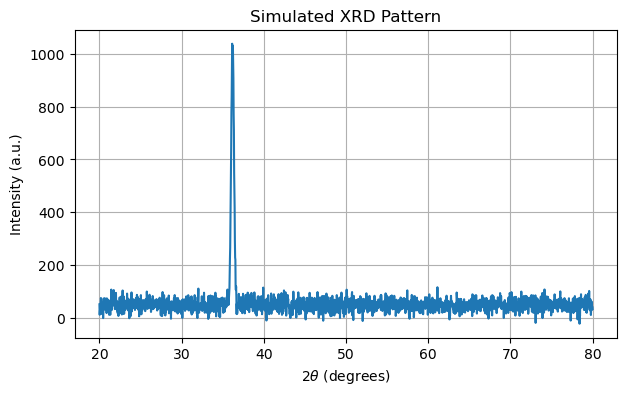

In [3]:
plt.figure(figsize=(7,4))
plt.plot(two_theta, intensity)
plt.xlabel(r"2$\theta$ (degrees)")
plt.ylabel("Intensity (a.u.)")
plt.title("Simulated XRD Pattern")
plt.grid(True)
plt.show()

## Peak Detection

In [4]:
# Find peaks
peaks, properties = find_peaks(intensity, height=200)

# Extract main peak
main_peak_index = peaks[np.argmax(properties["peak_heights"])]
peak_2theta = two_theta[main_peak_index]

## Full Width at Half Maximum (FWHM)

In [5]:
half_max = intensity[main_peak_index] / 2

# Find indices around half max
indices = np.where(intensity > half_max)[0]
fwhm = two_theta[indices[-1]] - two_theta[indices[0]]

## Crystallite Size Estimation

In [6]:
# Constants
K = 0.9
lambda_xray = 1.5406e-10  # Cu Kα in meters

theta_rad = np.deg2rad(peak_2theta / 2)
beta_rad = np.deg2rad(fwhm)

# Scherrer equation
D = (K * lambda_xray) / (beta_rad * np.cos(theta_rad))

# Convert to nanometers
D_nm = D * 1e9

## Extracted Parameters

In [7]:
print(f"Peak position (2θ): {peak_2theta:.2f} degrees")
print(f"FWHM: {fwhm:.3f} degrees")
print(f"Estimated crystallite size: {D_nm:.2f} nm")

Peak position (2θ): 36.15 degrees
FWHM: 0.390 degrees
Estimated crystallite size: 21.42 nm


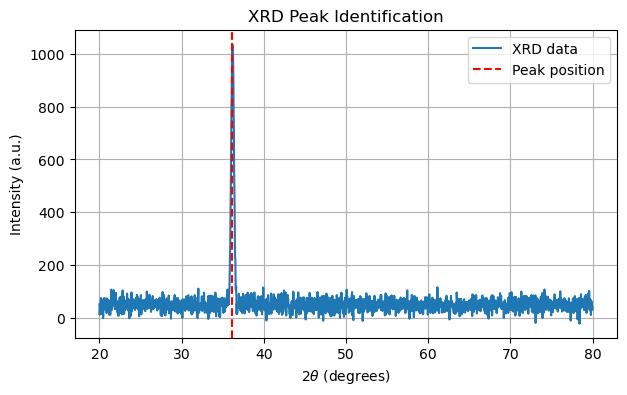

In [8]:
plt.figure(figsize=(7,4))
plt.plot(two_theta, intensity, label="XRD data")
plt.axvline(peak_2theta, color='r', linestyle='--', label="Peak position")
plt.xlabel(r"2$\theta$ (degrees)")
plt.ylabel("Intensity (a.u.)")
plt.title("XRD Peak Identification")
plt.legend()
plt.grid(True)
plt.show()